# SageMaker Model Monitor - visualizing monitoring results


The prebuilt container from SageMaker computes a variety of statistics and evaluates constraints out of the box. This notebook demonstrates how you can visualize them. You can grab the ProcessingJob arn from the executions behind a MonitoringSchedule and use this notebook to visualize the results.

Let's import some python libraries that will be helpful for visualization

In [5]:
from IPython.display import HTML, display
import json
import os
import boto3

import sagemaker
from sagemaker import session
from sagemaker.model_monitor import MonitoringExecution
from sagemaker.s3 import S3Downloader

## Get Utilities for Rendering

The functions for plotting and rendering distribution statistics or constraint violations are implemented in a `utils` file so let's grab that.

In [6]:
!wget https://raw.githubusercontent.com/awslabs/amazon-sagemaker-examples/master/sagemaker_model_monitor/visualization/utils.py

import utils as mu

--2023-03-12 12:32:27--  https://raw.githubusercontent.com/awslabs/amazon-sagemaker-examples/master/sagemaker_model_monitor/visualization/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13024 (13K) [text/plain]
Saving to: ‘utils.py.1’

utils.py.1          100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-03-12 12:32:27 (92.1 MB/s) - ‘utils.py.1’ saved [13024/13024]



## Get Execution and Baseline details from Processing Job Arn

Enter the ProcessingJob arn for an execution of a MonitoringSchedule below to get the result files associated with that execution

In [9]:
processing_job_arn = "arn:aws:sagemaker:us-east-1:902607334202:processing-job/model-monitoring-202303121200-cd064e9d85a81a2ce3940855" 

In [10]:
execution = MonitoringExecution.from_processing_arn(sagemaker_session=session.Session(), processing_job_arn=processing_job_arn)
exec_inputs = {inp['InputName']: inp for inp in execution.describe()['ProcessingInputs']}
exec_results = execution.output.destination

In [11]:
baseline_statistics_filepath = exec_inputs['baseline']['S3Input']['S3Uri'] if 'baseline' in exec_inputs else None
execution_statistics_filepath = os.path.join(exec_results, 'statistics.json')
violations_filepath = os.path.join(exec_results, 'constraint_violations.json')

baseline_statistics = json.loads(S3Downloader.read_file(baseline_statistics_filepath)) if baseline_statistics_filepath is not None else None
execution_statistics = json.loads(S3Downloader.read_file(execution_statistics_filepath))
violations = json.loads(S3Downloader.read_file(violations_filepath))['violations']

## Overview

The code below shows the violations and constraint checks across all features in a simple table.

In [12]:
mu.show_violation_df(baseline_statistics=baseline_statistics, latest_statistics=execution_statistics, violations=violations)

,data_type,completeness,baseline_drift,categorical_values
AGE,Fractional,100.00%,N/A,N/A
BILL_AMT1,Fractional,100.00%,N/A,N/A
BILL_AMT2,Fractional,100.00%,51.90%,N/A
BILL_AMT3,Fractional,100.00%,N/A,N/A
BILL_AMT4,Fractional,100.00%,N/A,N/A
BILL_AMT5,Fractional,100.00%,N/A,N/A
BILL_AMT6,Fractional,100.00%,N/A,N/A
EDUCATION,Fractional,100.00%,45.01%,N/A
LIMIT_BAL,Fractional,100.00%,N/A,N/A
Label,Fractional,100.00%,N/A,N/A


## Distributions

This section visualizes the distribution and renders the distribution statistics for all features

In [13]:
features = mu.get_features(execution_statistics)
feature_baselines = mu.get_features(baseline_statistics)

,num_present,num_missing,mean,sum,std_dev,min,max
Label,3066,0,0.196550,6.026219e+02,0.200169,0.005095,0.913502
PAY_AMT1,3066,0,-0.003062,-9.387391e+00,0.990241,-0.341476,24.032978
BILL_AMT1,3066,0,0.236511,7.251432e+02,0.082027,0.169771,1.238600
LIMIT_BAL,3066,0,166239.399870,5.096900e+08,130791.085264,10000.000000,1000000.000000
SEX,3066,0,1.616112,4.955000e+03,0.486331,1.000000,2.000000
EDUCATION,3066,0,-1.844749,-5.656000e+03,0.793832,-6.000000,-0.000000
MARRIAGE,3066,0,1.553490,4.763000e+03,0.522715,0.000000,3.000000
AGE,3066,0,25.438030,7.799300e+04,9.364663,11.000000,64.000000
PAY_0,3066,0,-0.044684,-1.370000e+02,1.098668,-2.000000,8.000000
PAY_2,3066,0,-0.157860,-4.840000e+02,1.196265,-2.000000,8.000000


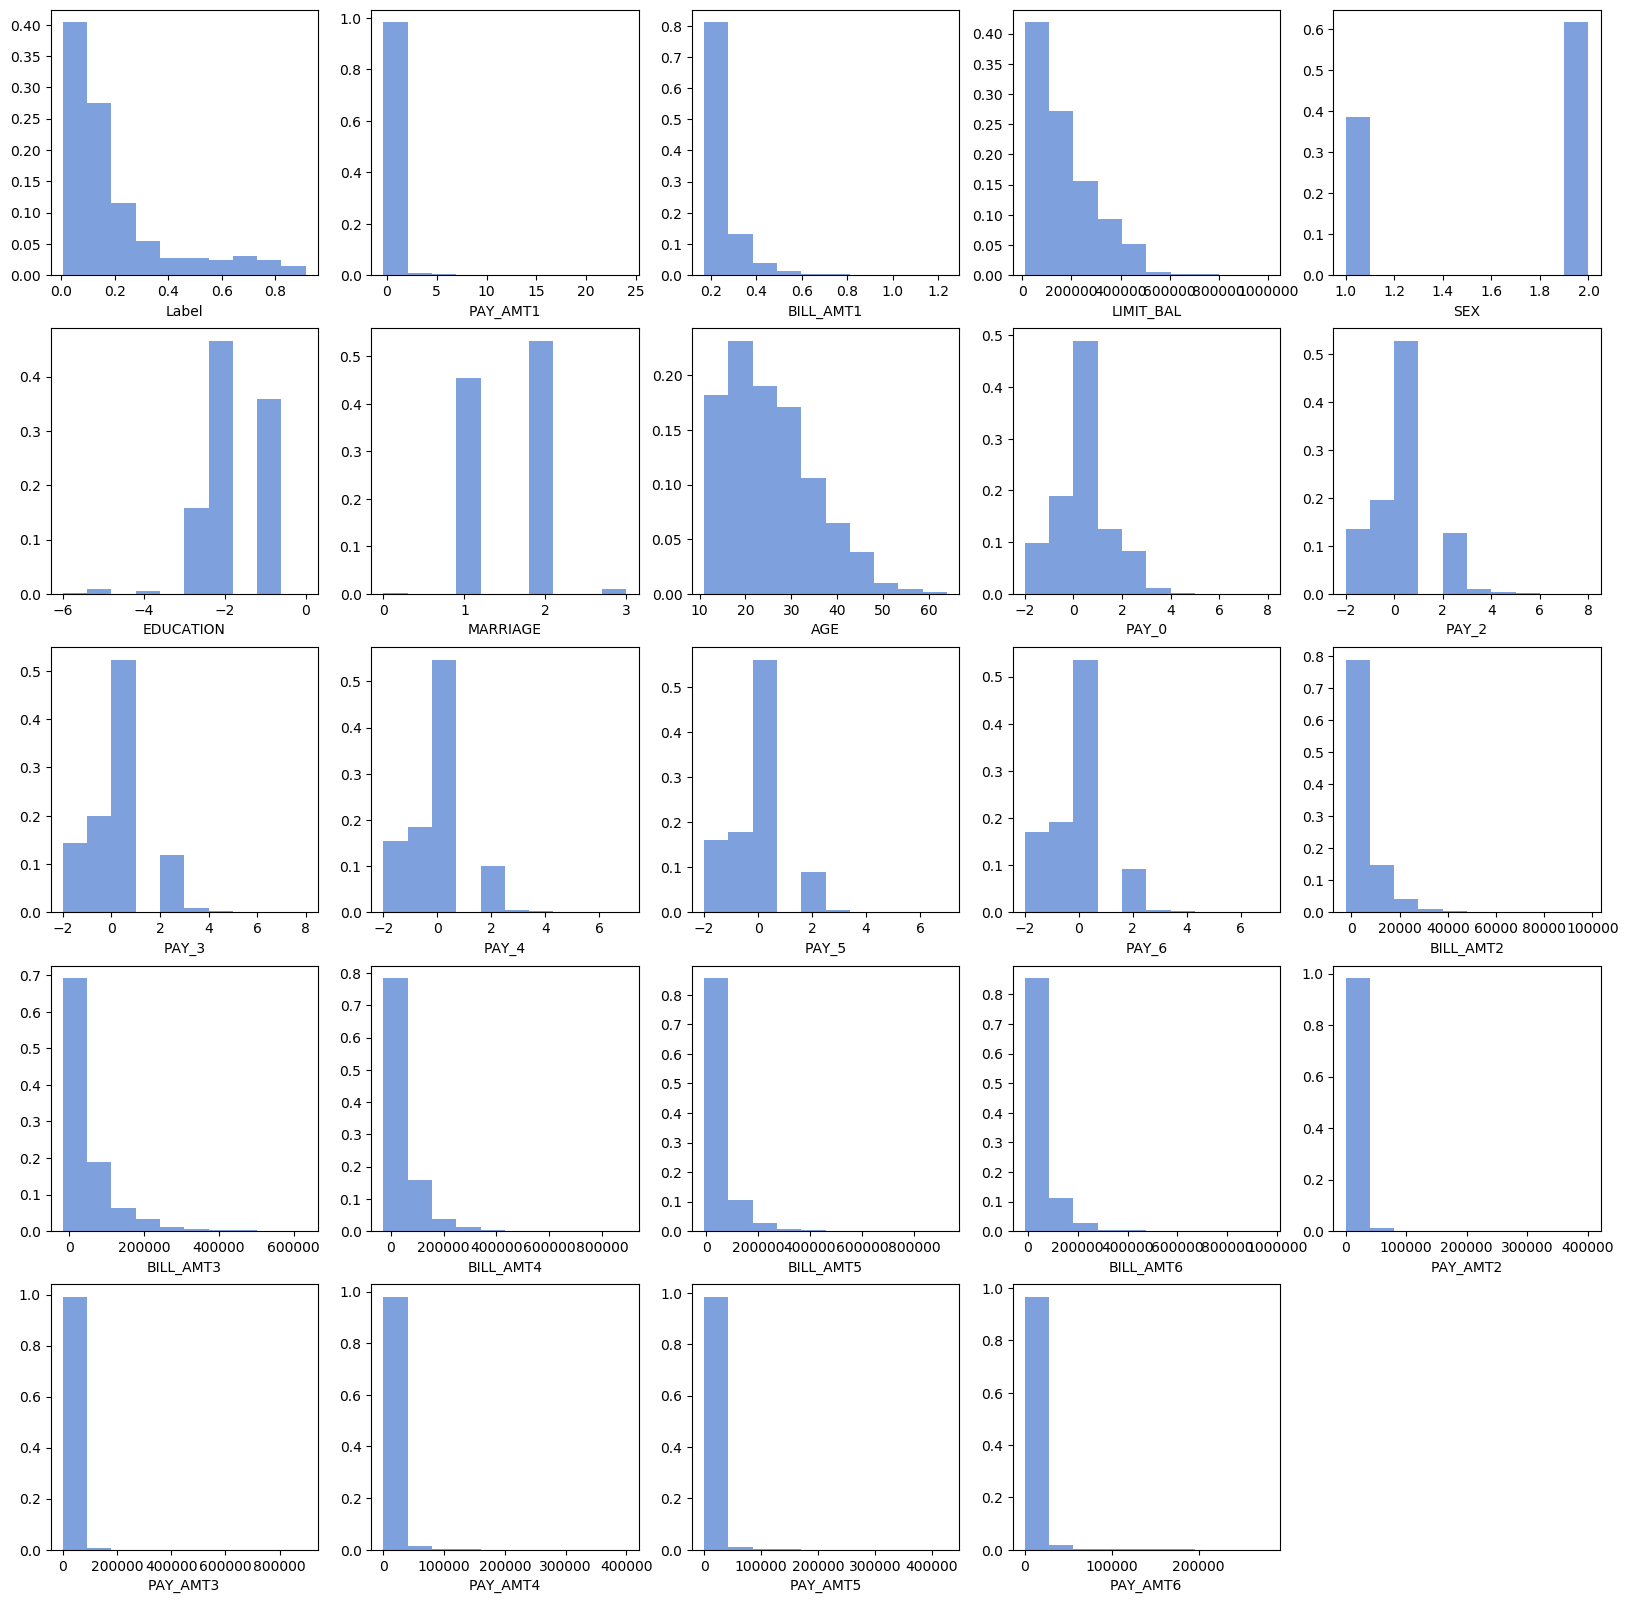

In [14]:
mu.show_distributions(features)

### Execution Stats vs Baseline

,num_present,num_missing,mean,sum,std_dev,min,max
Label,3066,0,0.196550,6.026219e+02,0.200169,0.005095,0.913502
PAY_AMT1,3066,0,-0.003062,-9.387391e+00,0.990241,-0.341476,24.032978
BILL_AMT1,3066,0,0.236511,7.251432e+02,0.082027,0.169771,1.238600
LIMIT_BAL,3066,0,166239.399870,5.096900e+08,130791.085264,10000.000000,1000000.000000
SEX,3066,0,1.616112,4.955000e+03,0.486331,1.000000,2.000000
EDUCATION,3066,0,-1.844749,-5.656000e+03,0.793832,-6.000000,-0.000000
MARRIAGE,3066,0,1.553490,4.763000e+03,0.522715,0.000000,3.000000
AGE,3066,0,25.438030,7.799300e+04,9.364663,11.000000,64.000000
PAY_0,3066,0,-0.044684,-1.370000e+02,1.098668,-2.000000,8.000000
PAY_2,3066,0,-0.157860,-4.840000e+02,1.196265,-2.000000,8.000000


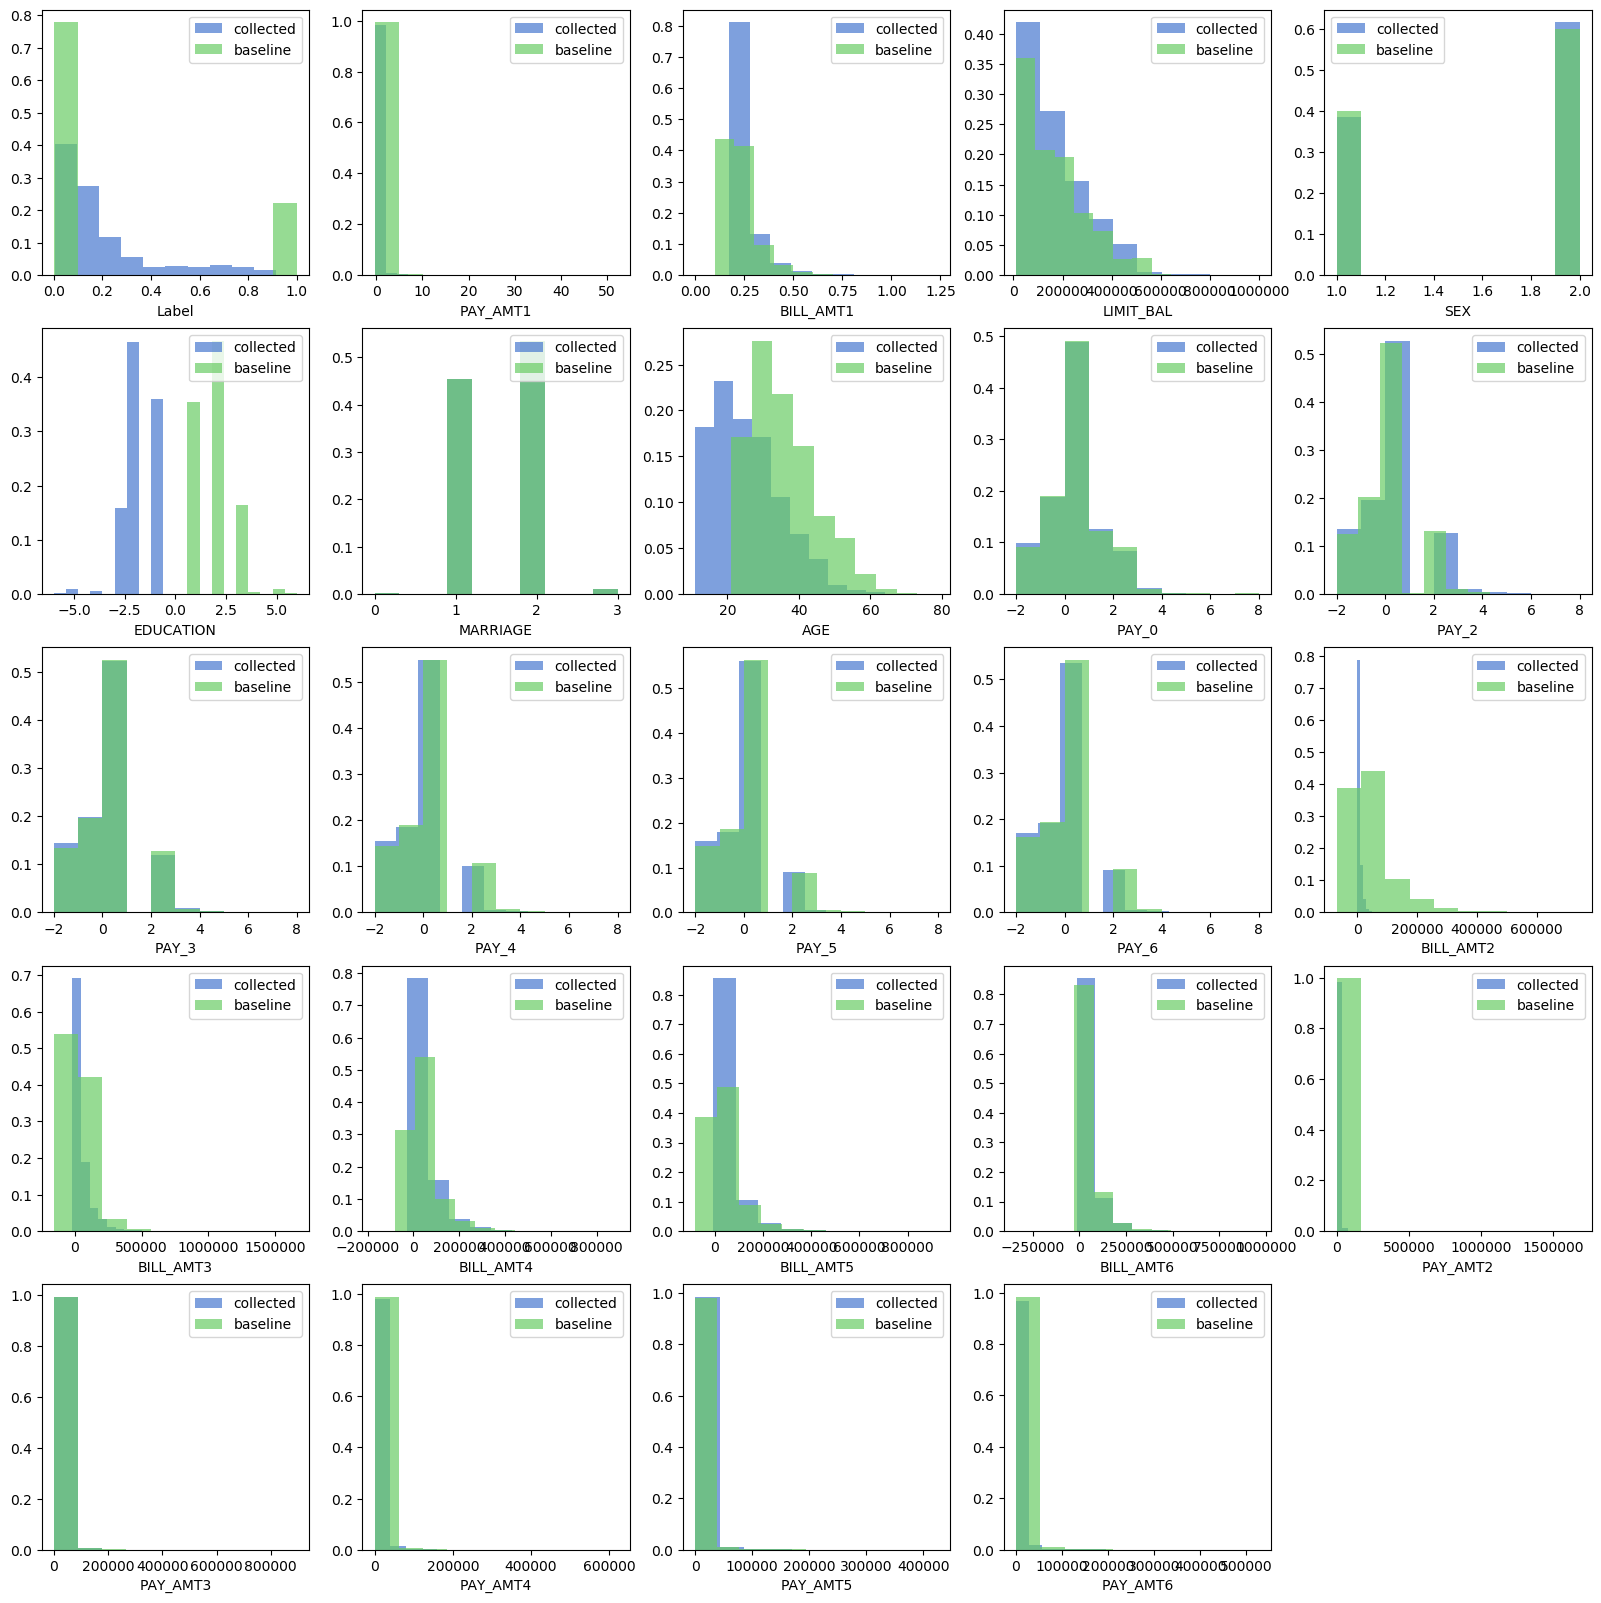

In [15]:
mu.show_distributions(features, feature_baselines)